# 前提条件
## 检查Python 版本
```
python --version
```

python版本：version > 3.9


## 更新pip
```
python -m pip install --upgrade pip
```

## 安装openai 
```
pip install openai
``` 

## 安装dotenv
```
pip install python-dotenv
```



### 生成系统配置文件
```python
# 定义环境变量内容，可以是字典形式
env_vars = {
    "api_key": "12341234", # 替换成gemini密钥
    "base_url": "https://generativelanguage.googleapis.com/v1beta/openai/",
    "model": "gemini-2.5-flash"
}

# 写入.env文件
with open(".env", "w") as f:
    for key, value in env_vars.items():
        f.write(f"{key}={value}\n")

print(".env文件已生成。")
```

### 测试系统变量
```python
import dotenv
import os
dotenv.load_dotenv()
print(os.getenv('api_key'))
```

## 连接服务

In [ ]:
import os
import dotenv
import pandas as pd
from openai import OpenAI

dotenv.load_dotenv('google.env', override=True)

client = OpenAI(
    api_key = os.getenv('api_key'),
    base_url = os.getenv('base_url')
)

models = [dict(model) for model in client.models.list()]    #  Gets available OpenAI models
pd.DataFrame(models)

,id,created,object,owned_by,display_name
0,models/embedding-gecko-001,None,model,google,Embedding Gecko
1,models/gemini-2.5-pro-preview-03-25,None,model,google,Gemini 2.5 Pro Preview 03-25
2,models/gemini-2.5-flash-preview-05-20,None,model,google,Gemini 2.5 Flash Preview 05-20
3,models/gemini-2.5-flash,None,model,google,Gemini 2.5 Flash
4,models/gemini-2.5-flash-lite-preview-06-17,None,model,google,Gemini 2.5 Flash-Lite Preview 06-17
...,...,...,...,...,...
59,models/gemini-live-2.5-flash-preview,None,model,google,Gemini Live 2.5 Flash Preview
60,models/gemini-2.5-flash-live-preview,None,model,google,Gemini 2.5 Flash Live Preview
61,models/gemini-2.5-flash-native-audio-latest,None,model,google,Gemini 2.5 Flash Native Audio Latest
62,models/gemini-2.5-flash-native-audio-preview-0...,None,model,google,Gemini 2.5 Flash Native Audio Preview 09-2025


## 与LLM对话

### Chat Completion 概述

*   **核心功能**：`Chat Completion` 是 OpenAI Python 库中的主要功能，用于让模型根据输入生成聊天回复。

*   **输入类型**：输入数据可以包含多种类型，如文本和图像（本文档目前仅关注文本）。
*   **应用场景**：OpenAI 的 ChatGPT Web 界面在后台也使用了 `Chat Completion`
，它将聊天历史（包括最新消息和先前上下文）作为输入，生成最合适的回复。

### 在 Python 中使用 Chat Completion

1.  **聊天历史表示**：
    *   聊天历史被表示为一个
**消息列表**。
    *   列表中的每个消息又是一个 **Python 字典**。

2.  **消息字典的关键属性**：
    *   每个消息字典至少需要指定两个重要属性：`role` 和 `
content`。

3.  **`role` 属性详解**：
    *   `role` 属性指定消息的来源。
        *   **`user`**：标识由用户编写的消息。

        *   **`assistant`**：标识由语言模型生成的消息。
        *   **`system`**：
            *   通常用于聊天历史的开头。
            *   旨在向模型传达独立于用户
    任务的通用指导方针（例如：“你是一个乐于助人的助手”）。

4.  **`content` 属性
详解**：
    *   `content` 属性指定消息的具体内容。

In [9]:
dotenv.load_dotenv('copilot.env', override=True)

client = OpenAI(
    api_key=os.getenv('api_key'),
    base_url=os.getenv('base_url')
)
model = os.getenv('model') 
result = client.chat.completions.create(
                                        model=model,
                                        messages=[{ 
                                        'role':'user',
                                        'content':'Tell me a story!'
                                        }])
print(result)

ChatCompletion(id='chatcmpl-CMDTrSvCmbU09Fr8XeD2QNOTiP0Qp', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Absolutely! Here's a story for you:\n\n---\n\n**The Clockmaker's Apprentice**\n\nIn the heart of a bustling old town stood a shop unlike any other—a haven of ticking gears, golden faces, and winding keys. The clockmaker, Mr. Finch, was famous for coaxing lost seconds back into timepieces the world had forgotten.\n\nOne rainy morning, a soaked boy named Eli appeared at the shop’s door. He clutched a broken pocket watch, a gift from his late grandfather. Embarrassed, Eli asked if Mr. Finch could fix it. The clockmaker peered at the watch, then at Eli’s hopeful eyes, and smiled. “I’ll do one better. I’ll teach you to fix it yourself.”\n\nFor weeks, Eli learned the trade. He marveled at the patience required to mend tiny springs and polished faces until he could see his own reflection staring back. But just as the watch’s heart beg

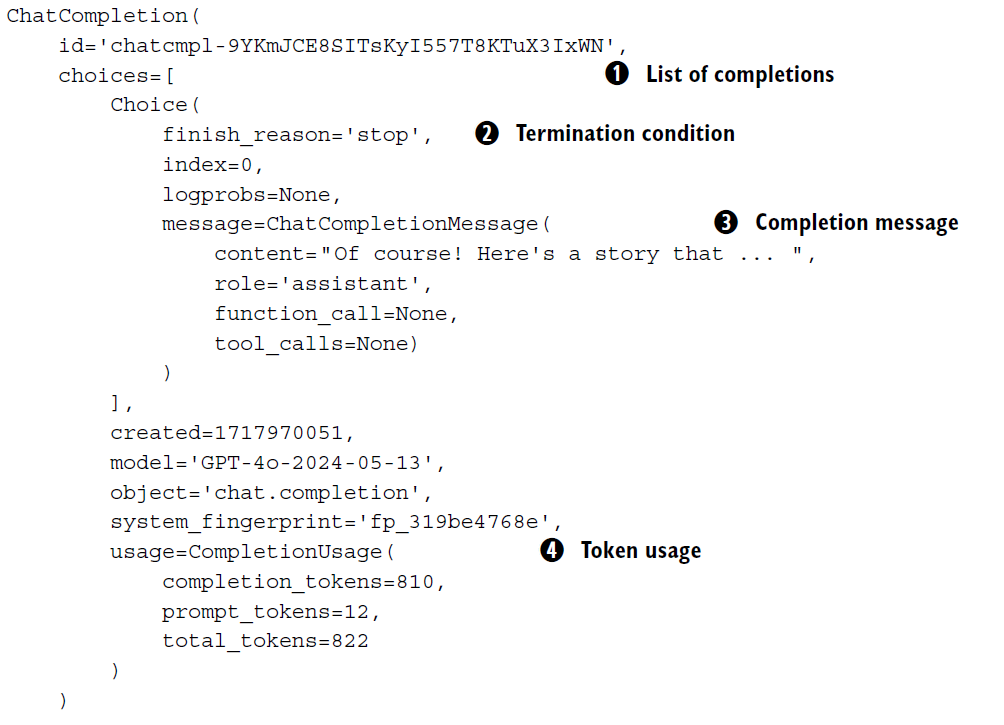

### 要点说明



*   **① 完成替代项 (Completion Alternatives)**
：
    *   这是一个`Choice`类型的对象列表。
    *   默认情况下只包含一个条目，但可以通过配置参数请求多个替代项。
*   **② `finish_reason` 标志**：

    *   指明每个完成项停止生成的原因。
    *   例如，可能是达到了生成的文本长度限制。
    *   `stop` 值表示语言模型能够生成完整的输出（而不是达到长度限制）。
*   **③ 实际消息内容 (Actual Message Content)**：
    *   通常是缩写形式。
    *   如果重复调用代码，很可能会看到不同的内容。
*   **④ 元数据和使用统计 (Metadata and Usage
Statistics)**：
    *   除了完成项本身，结果还包含额外信息。

### [定制对话](https://platform.openai.com/docs/api-reference/certificates/activateProjectCertificates)


在调用聊天完成模型时，输出生成会持续进行，直到满足某个停止条件。以下是
两个用于配置文本生成停止的关键参数：

#### 1. `max_tokens` 参数

*   **功能**: 指定模型在完成过程中将生成的最大令牌（token）数量。
*   **令牌定义**:
文本的原子单位，大约相当于四个字符；一个典型段落包含约100个令牌。
*   **模型限制**: 不同模型支持的最大令牌数不同（例如，Ada支持2,049个，GPT
-4o支持128,000个）。
*   **重要提示**:
    *   模型的总令牌限制包括**读取的令牌（提示）**和**生成的令牌（输出）**。
    * `max_tokens`仅指**生成的令牌**数量。
    *   因此，`max_tokens`的值不应超过 `模型支持的最大令牌数` 减去 `提示中的令牌数`。
*   **好处**: 设置合理的`max_tokens`值有助于控制每次模型调用的成本，因为您需要为每个生成的令牌付费。

#### 2. `stop` 参数

*   **功能**: 配置模型在生成特定令牌
序列时停止输出。
*   **使用场景**: 当期望的输出以特定文本模式结束时非常有用，例如：
    *   生成代码时，可以是编程语言特定的结束字符串。
    *   生成故事
时，可以是“and they lived happily ever after!”等短语。
*   **配置方式**:
    *   **单个停止序列**: 直接将`stop`参数赋值为相应的字符串。
    *   **多个
停止序列**: 将`stop`参数赋值为一个最多包含四个字符串的列表。
*   **行为**: 只要生成了这些序列中的任何一个，文本生成就会终止。

#### 3. `max_tokens`和 `stop` 的联合使用

*   这两个参数可以同时使用。
*   **停止条件**: 输出生成将在以下任一情况发生时停止（以先发生者为准）：
    *   达到`max_tokens
`设定的长度限制。
    *   生成了`stop`参数中指定的任何一个停止序列。

### 影响GPT模型输出生成的参数

OpenAI 提供了一些参数，允许用户在输出终止之前，对GPT模型选择输出文本的方式进行偏置。这些参数主要
分为两类：影响重复性及直接偏置特定词元。

#### 1. 影响输出重复性的参数

这些参数用于控制生成输出的“重复性”，即是否鼓励或避免重复使用相同的词元。


*   **`presence_penalty`**
    *   **目的**：惩罚在聊天补全中重复使用相同词元的情况。
    *   **范围**：-2 到 +2 (默认值为
0)。
    *   **效果**：
        *   **正值**：鼓励模型避免重复使用相同的词元。
        *   **负值**：鼓励模型重复使用相同的词元。
        *   **绝对值越高**：效果越强。
        *   **特点**：仅基于词元的“存在”进行惩罚，不区分词元出现的次数。

*   **`frequency_penalty`**

    *   **目的**：提供更细粒度的惩罚机制，基于词元在历史中出现的频率。
        *   **范围**：-2 到 +2 (默认值为 0)。
        *   **效果**：
            *   **正值**：鼓励GPT模型避免重复相同的词元（词元使用次数越多，再次出现的可能性越低）。
            *   **负值**：鼓励重复使用词元。

    *   **特点**：作为因子，乘以词元之前的出现次数来聚合其分数，从而影响其再次出现的可能性。
1. **presence_penalty（出现惩罚）**
- 作用是惩罚那些在生成文本中已经出现过的词，无论该词出现多少次。
- 只要一个词出现过一次，模型选择该词的概率就被降低。
- 目的在于鼓励模型引入**新的词汇**，避免重复使用已经出现过的词。

2. **frequency_penalty（频率惩罚）**
- 作用是根据词在生成文本中出现的频率来惩罚它。
- 词出现得越频繁，被惩罚的力度越大，选择该词的概率越低。
- 目的在于减少同一个词多次重复，提高文本的多样性。

### 总结对比

| 参数             | 作用对象                      | 主要效果                   |
|------------------|-----------------------------|----------------------------|
| presence_penalty  | 词是否出现过                 | 抑制重复使用已出现的词，鼓励新词 |
| frequency_penalty | 词出现的次数（频率）         | 减少高频词的重复，控制重复频次 |

简单来说，presence_penalty关注“有没有出现过”，frequency_penalty关注“出现了多少次”。

假设模型正在生成一段文本，内容涉及“苹果”（apple）这个词。

---

### 情景Ａ：没有惩罚（presence_penalty=0，frequency_penalty=0）
模型可能反复使用“apple”，比如：
*"I like apple. Apple is my favorite fruit. Apple tastes sweet."*

---

### 情景B：使用 **presence_penalty=1.0**，frequency_penalty=0
presence_penalty 会惩罚所有已经出现过的词，不管它出现多少次：
模型倾向于避免再用“apple”，可能生成：
*"I like apple. The fruit is sweet and delicious. It grows on trees."*
这里“apple”只出现一次，之后倾向用“the fruit”等不同表达，减少重复。

---

### 情景C：使用 presence_penalty=0，**frequency_penalty=1.0**
frequency_penalty 会根据“apple”出现的次数逐步惩罚：
模型可能先频繁用“apple”，但随着次数增多，逐渐减少使用，转而用同义词或代词：
*"Apple is my favorite fruit. Apple tastes sweet. It is also rich in vitamins."*
相比无惩罚情况，重复次数减少，但没有完全避免再用“apple”。

#### 2. 偏置特定词元的参数

此参数允许用户直接影响模型选择
特定词元的倾向。

*   **`logit_bias`**
    *   **目的**：将词元ID映射到偏置因子，从而鼓励或阻止模型使用特定的词元作为输出。
    *   **值
类型**：一个Python字典，将词元ID映射到 -100 到 +100 之间的值（通常在 -1 到 +1 之间）。
    *   **效果**：
        *
**高偏置因子**：鼓励模型考虑相应的词元作为输出。
        *   **足够低的偏置分数**：基本阻止模型使用该词元。
        *   **足够高的分数**：几乎保证
相应的词元会出现在输出中。
    *   **应用场景**：在可以缩小合理词元范围的情况下，避免生成无用输出，例如文本分类（预先确定类别）。
    *   **如何查找词元ID
**：可以使用GPT分词器工具（`https://platform.openai.com/tokenizer?view=bpe`），输入词语即可显示关联的词元ID。请确保选择与您模型对应的正确分词器。



### 配置随机性 (Configuring Randomization)


#### GPT模型选择输出Token的机制

- 计算所有可能输出Token的分数。

- 基于分数选择Token，但不总是选择分数最高的Token。

- 引入随机性，允许生成多样化回复。

- 完全固定选择最高分Token，回复缺乏多样性。

- 过度随机化可能导致输出无意义，与输入和指令脱节。


#### 随机性调节参数

##### 1. Temperature（温度）

- Temperature 是一个非负实数，通常设置在0到1之间，但也可以大于1。
- 当 temperature 较低（接近0）时，模型生成的文本更确定、更保守，倾向于选择概率最高的词，生成的内容比较稳定但可能比较单一。
- 当 temperature 较高时（如1或更高），模型生成的文本更有随机性，会更多地采样概率较低的词，内容更加多样化和创造性，但可能也会出 现不太合理的词句。

简单来说，temperature控制的是模型输出的“随机程度”：

- temperature = 0 时，模型几乎是确定地选概率最高的词（类似贪心算法）。
- temperature 越高，生成内容越多样和有创造力。

举个例子，temperature=0.7是一个常用的平衡点，既保留一定的多样性，又不会太混乱。

- 控制随机性的常用参数。

- 值范围：0 到 2，默认值为 1。

- 值越高，随机性越大，Token选择更趋于均匀概率。

- 值越低，随机性越小，倾向选择分数最高Token。

- 在极低温度时，基本总选择最高分Token。


##### 2. Top_p（概率质量截断）

“top”通常是指“top-p”采样，也称为“核采样”（nucleus sampling），它是一种用于生成文本的采样策略。

具体来说：

- top-p采样会先将模型预测的所有词汇按概率从高到低排序。
- 然后选取累计概率达到p的词汇集合（比如p=0.9，即选出概率总和达到90%的词汇）。
- 接着从这个词汇集合中随机采样下一个词。

这个方法的优点是相比固定选择概率最高的词（贪心策略）或仅选最高的几个词（top-k采样），top-p采样更灵活，能够动态调整候选词的数量 ，从而平衡生成文本的多样性和合理性。

- 另一种调节随机性的方法。

- 不建议在同一次调用中同时调整 temperature 和 top_p。

- 按概率排序所有Token，累积概率达到 top_p 值后停止。

- 只在这部分高概率Token中随机选择下一个输出Token。

- top_p 取值范围：0 到 1。

- 值越高，考虑Token越多，随机性越大。





In [11]:
result = client.chat.completions.create(
                                        model=model,
                                        messages=[{
                                                    'role':'user',
                                                    'content':'Tell me a story!'
                                                    }],
                                    max_tokens=2048, #  Limits the output length
                                    stop='happily ever after', #  Sets a stopping condition
                                    temperature=1.5, #  Sets temperature
                                    presence_penalty=0.5,  # Penalizes repetitions
                                    logit_bias={14844:-100}) # Adds bias

print(result.choices[0].message.content)

Sure! Here’s a story for you:

---

In a little town where the rooftops glittered with morning dew, a girl named Mae lived in a tiny house painted yellow. Mae loved secrets: honey hidden in cupboards, the smile a flower made before blooming, how moths danced when no one looked.

One summer evening, as mist seemed tumble from stars, she heard singing behind her house. It wasn't her neatly present neighbors, but something gentler and a little wild.

Behind her garden, a sly field mouse held council with an anxious cricket and three very dignified snails wearing what seemed legitimate crowns (Mae promised later never to retell kingdom gossip under oath in case of royal dangers).

By torch-blink and lantern-warmth, they invited Mae to their festival—for tonight, wishes bounded barefoot and laughter was a ticket bought only by the too-curious.

Mae lit candles from grapevine branches, asking the mice given watch to keep the wind away. She nibbled wild bread that tasted a bit like vanilla ad